In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
   


In [20]:
data = pd.read_csv("D:\ml\dataset\house_Prices.csv")

In [21]:
print(data.head())
print(data.info())
print(data.describe())
   


   ID             Date     Price  Bedrooms  Bathrooms  Sqft_living  Sqft_lot   
0   1  20140916T000000  280000.0         6       3.00         2400      9373  \
1   2  20150422T000000  300000.0         6       3.00         2400      9373   
2   3  20140508T000000  647500.0         4       1.75         2060     26036   
3   4  20140811T000000  400000.0         3       1.00         1460     43000   
4   5  20150401T000000  235000.0         3       1.00         1430      7599   

   Floors  Waterfront  View  ...  Grade  Sqft_above  Sqft_basement  Yr_built   
0     2.0           0     0  ...      7        2400              0      1991  \
1     2.0           0     0  ...      7        2400              0      1991   
2     1.0           0     0  ...      8        1160            900      1947   
3     1.0           0     0  ...      7        1460              0      1952   
4     1.5           0     0  ...      6        1010            420      1930   

   Yr_renovated  zipcode      Lat     

In [24]:
data = data.dropna()
data = pd.get_dummies(data)
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
   


In [25]:
   model = keras.Sequential([
       keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
       keras.layers.Dense(64, activation='relu'),
       keras.layers.Dense(32, activation='relu'),
       keras.layers.Dense(1)
   ])

   model.compile(optimizer='adam', loss='mean_squared_error')

   model.summary()
   


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               50176     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 60,545
Trainable params: 60,545
Non-trainable params: 0
_________________________________________________________________


In [26]:
   history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)
   


Epoch 1/100
433/433 [==============================] - 1s 2ms/step - loss: 348320923648.0000 - val_loss: 109708525568.0000
Epoch 2/100
433/433 [==============================] - 1s 2ms/step - loss: 64147660800.0000 - val_loss: 55498600448.0000
Epoch 3/100
433/433 [==============================] - 1s 2ms/step - loss: 51122823168.0000 - val_loss: 50482085888.0000
Epoch 4/100
433/433 [==============================] - 1s 2ms/step - loss: 47736074240.0000 - val_loss: 48003899392.0000
Epoch 5/100
433/433 [==============================] - 1s 2ms/step - loss: 45664796672.0000 - val_loss: 46583783424.0000
Epoch 6/100
433/433 [==============================] - 1s 2ms/step - loss: 44215640064.0000 - val_loss: 45568987136.0000
Epoch 7/100
433/433 [==============================] - 1s 2ms/step - loss: 43101212672.0000 - val_loss: 45013569536.0000
Epoch 8/100
433/433 [==============================] - 1s 2ms/step - loss: 42174259200.0000 - val_loss: 44039200768.0000
Epoch 9/100
433/433 [=========

Epoch 68/100
433/433 [==============================] - 1s 3ms/step - loss: 22130094080.0000 - val_loss: 2652853764096.0000
Epoch 69/100
433/433 [==============================] - 1s 2ms/step - loss: 21993953280.0000 - val_loss: 2748817604608.0000
Epoch 70/100
433/433 [==============================] - 1s 2ms/step - loss: 21835927552.0000 - val_loss: 2874660618240.0000
Epoch 71/100
433/433 [==============================] - 1s 2ms/step - loss: 21782534144.0000 - val_loss: 3018462855168.0000
Epoch 72/100
433/433 [==============================] - 1s 2ms/step - loss: 21603166208.0000 - val_loss: 3142639157248.0000
Epoch 73/100
433/433 [==============================] - 1s 2ms/step - loss: 21491095552.0000 - val_loss: 3309396295680.0000
Epoch 74/100
433/433 [==============================] - 1s 2ms/step - loss: 21434742784.0000 - val_loss: 3441904844800.0000
Epoch 75/100
433/433 [==============================] - 1s 2ms/step - loss: 21237587968.0000 - val_loss: 3583684116480.0000
Epoch 76

In [28]:
   predictions = model.predict(X_test)
   mse = mean_squared_error(y_test, predictions)
   print(f"Mean Squared Error: {mse}")
   


136/136 [==============================] - 0s 2ms/step
Mean Squared Error: 1134801648052.2275


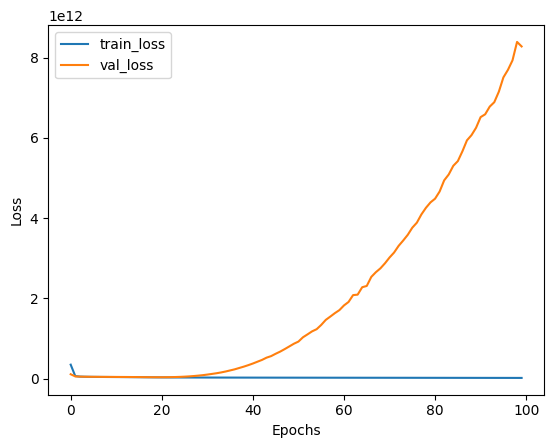

In [29]:
   import matplotlib.pyplot as plt

   plt.plot(history.history['loss'], label='train_loss')
   plt.plot(history.history['val_loss'], label='val_loss')
   plt.xlabel('Epochs')
   plt.ylabel('Loss')
   plt.legend()
   plt.show()
   
